# Classifying Face Images with SVM

In [12]:
from sklearn.datasets import fetch_lfw_people


In [13]:
face_data = fetch_lfw_people(min_faces_per_person=80)

In [14]:
X = face_data.data
Y = face_data.target

print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names)

Input data size : (1140, 2914)
Output data size : (1140,)
Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [15]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


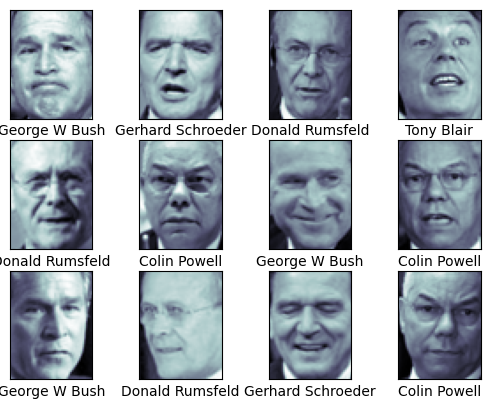

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt .subplots(3, 4)
for i, axi in  enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_data.target_names[face_data.target[i]])


plt.show()

## Building an SVM-based Image Classifier

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)


In [30]:
from sklearn.svm import SVC 
clf = SVC(class_weight='balanced', random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV 
parameters = {'C': [10, 100, 300], 'gamma': [0.0001, 0.0003, 0.001],
             'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

In [33]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [10, 100, 300], 'gamma': [0.0001, 0.0003, 0.001],
                         'kernel': ['rbf', 'linear']})

In [34]:
print('The best model:\n', grid_search.best_params_)



The best model:
 {'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}


In [35]:
print('The best averaged performance:', grid_search.best_score_)

The best averaged performance: 0.8456140350877192


In [36]:
clf_best = grid_search.best_estimator_

print(f'The accuracy is: {clf_best.score(X_test, Y_test)*100:.1f}%')

The accuracy is: 89.8%


In [37]:
pred = clf_best.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, pred, target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.90      0.88      0.89        64
  Donald Rumsfeld       0.90      0.84      0.87        32
    George W Bush       0.89      0.94      0.92       127
Gerhard Schroeder       0.90      0.90      0.90        29
       Tony Blair       0.90      0.85      0.88        33

         accuracy                           0.90       285
        macro avg       0.90      0.88      0.89       285
     weighted avg       0.90      0.90      0.90       285



## Boosing Image Classification Performance with PCA 

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(class_weight='balanced', kernel='rbf', random_state=42)

from sklearn.pipeline import Pipeline
model = Pipeline([('pca', pca),
                  ('svc', svc)])

In [39]:
parameters_pipeline = {'svc__C': [1, 3, 10],
                       'svc__gamma': [0.01,  0.03, 0.003]}
grid_search = GridSearchCV(model, parameters_pipeline, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=100, random_state=42,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 3, 10],
                         'svc__gamma': [0.01, 0.03, 0.003]})

In [40]:
print('The best model:\n', grid_search.best_params_)
print('The best averaged performance:', grid_search.best_score_)

model_best = grid_search.best_estimator_
print(f'The accuracy is: {model_best.score(X_test, Y_test)*100:.1f}%')
pred = model_best.predict(X_test)
print(classification_report(Y_test, pred, target_names=face_data.target_names))

The best model:
 {'svc__C': 1, 'svc__gamma': 0.01}
The best averaged performance: 0.8619883040935671
The accuracy is: 92.3%
                   precision    recall  f1-score   support

     Colin Powell       0.94      0.94      0.94        64
  Donald Rumsfeld       0.93      0.84      0.89        32
    George W Bush       0.91      0.97      0.94       127
Gerhard Schroeder       0.92      0.79      0.85        29
       Tony Blair       0.94      0.91      0.92        33

         accuracy                           0.92       285
        macro avg       0.93      0.89      0.91       285
     weighted avg       0.92      0.92      0.92       285



## Estimating with Support Vector Regression
#### Implementing SVR

In [41]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

print('Input data size :', X.shape)
print('Output data size :', Y.shape)
 



Input data size : (442, 10)
Output data size : (442,)


In [42]:
num_test = 30    # the last 30 samples as testing set
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]



In [43]:
from sklearn.svm import SVR
regressor = SVR(C=100, kernel='linear')
regressor.fit(X_train, y_train)



SVR(C=100, kernel='linear')

In [44]:
from sklearn.metrics import r2_score
predictions = regressor.predict(X_test)
print(r2_score(y_test, predictions))



0.5868189735154501


In [45]:
parameters = {'C': [300, 500, 700],
              'gamma': [0.3, 0.6,  1]}
regressor = SVR()
grid_search = GridSearchCV(regressor, paramters, n_jobs=-1, cv=5)

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10, 100, 300], 'gamma': [0.0001, 0.0003, 0.001],
                         'kernel': ['rbf', 'linear']})

In [47]:
print('The best model:\n', grid_search.best_params_)

The best model:
 {'C': 300, 'gamma': 0.0001, 'kernel': 'linear'}


In [48]:
model_best = grid_search.best_estimator_
predictions = model_best.predict(X_test)
print(r2_score(y_test, predictions))

0.6444744612820399
